In [1]:
import numpy as np
from algorithms import steepest_descent, conjugate_gradient, secant, Finite_Difference, armijo
from cost_functions import V_a, gradV_a, V_b, gradV_b, V_c, gradV_c
from utils import visualize_optimization, visualize_optimization_multiple


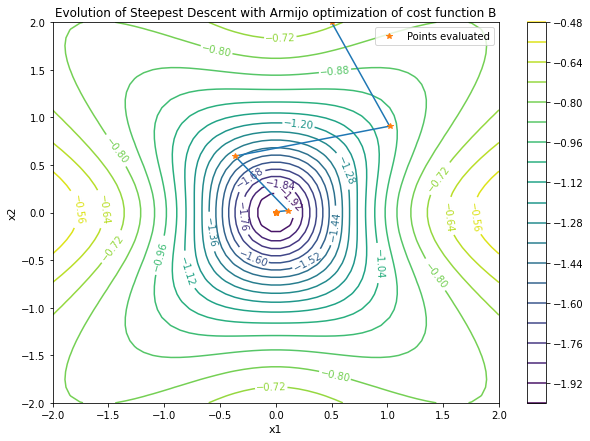

In [6]:
x0 = np.array([[0.5], [2.0]])

x, minimum, x_hist1, V_hist =  steepest_descent(x0,
                                                V_b,
                                                gradV_b,
                                                step_size = 'armijo',
                                                threshold = 1e-4, 
                                                log = True, 
                                                h = 1e-8, 
                                                max_iter = 1e5, 
                                                fd_method = 'central', 
                                                track_history = True)

visualize_optimization(x_hist1, V_b, 'B', 'Steepest Descent with Armijo')

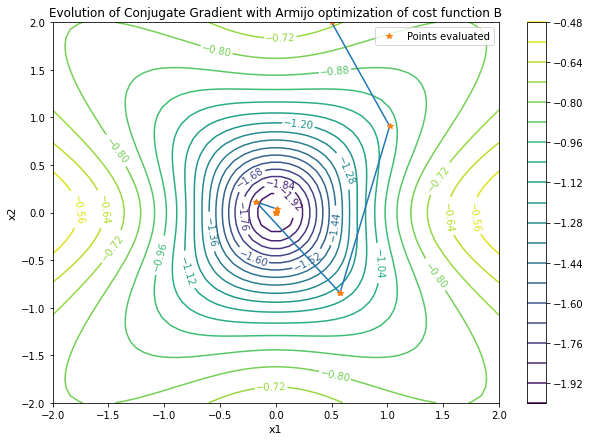

In [7]:
x0 = np.array([[0.5], [2.0]])

x, minimum, x_hist2, V_hist =  conjugate_gradient(x0,
                                                V_b,
                                                gradV_b,
                                                step_size = 'armijo',
                                                threshold = 1e-4, 
                                                log = False, 
                                                h = 1e-8, 
                                                max_iter = 1e5, 
                                                fd_method = 'central', 
                                                track_history = True)

visualize_optimization(x_hist2, V_b, 'B', 'Conjugate Gradient with Armijo')

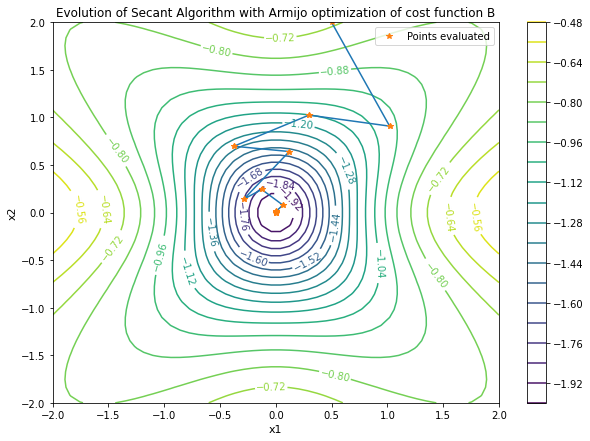

In [8]:
x0 = np.array([[0.5], [2.0]])

x, minimum, x_hist3, V_hist =  secant(x0,
                                    V_b,
                                    gradV_b,
                                    step_size = 'armijo',
                                    threshold = 1e-4, 
                                    log = False, 
                                    h = 1e-8, 
                                    max_iter = 1e5, 
                                    fd_method = 'central', 
                                    track_history = True)

visualize_optimization(x_hist3, V_b, 'B', 'Secant Algorithm with Armijo')

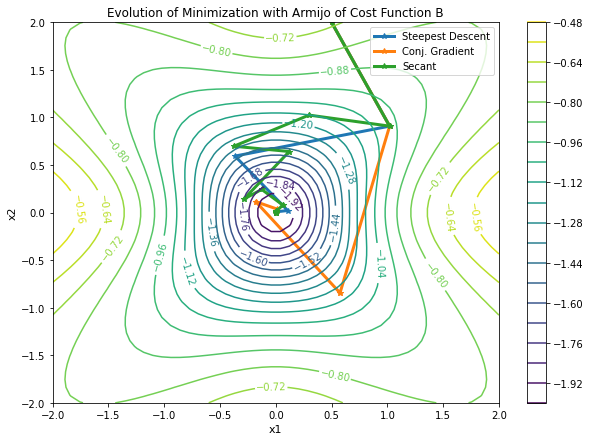

In [9]:
names = ['Steepest Descent', 'Conj. Gradient', 'Secant']
visualize_optimization_multiple([x_hist1, x_hist2, x_hist3], V_b, names, 'B')

In [45]:
x0 = np.array([[0.1], [0.1]])

x, minimum, x_hist1_c, V_hist =  steepest_descent(x0,
                                    V_c,
                                    gradV_c,
                                    step_size = 1e-4,
                                    threshold = 1e-4, 
                                    log = False, 
                                    h = 1e-8, 
                                    max_iter = 1e5, 
                                    fd_method = 'central', 
                                    track_history = True) 

In [46]:
  

x, minimum, x_hist2_c, V_hist =  conjugate_gradient(x0,
                                    V_c,
                                    gradV_c,
                                    step_size = 'armijo',
                                    threshold = 1e-4, 
                                    log = False, 
                                    h = 1e-8, 
                                    max_iter = 1e5, 
                                    fd_method = 'central', 
                                    track_history = True)

x, minimum, x_hist3_c, V_hist =  secant(x0,
                                    V_c,
                                    gradV_c,
                                    step_size = 'armijo',
                                    threshold = 1e-4, 
                                    log = False, 
                                    h = 1e-8, 
                                    max_iter = 1e5, 
                                    fd_method = 'central', 
                                    track_history = True)                             

In [2]:
def V_c_VIS(x):
    if x.shape[0] != 2:
        raise ValueError('X must have dimension 2.')
    x, y = x[0], x[1]
    return 1 + x+2*y + 0.5*(12*x**2+6*x*y+10*y**2)+10*np.log(1+x**4)*np.sin(100*x)+10*np.log(1+y**4)*np.cos(100*y)

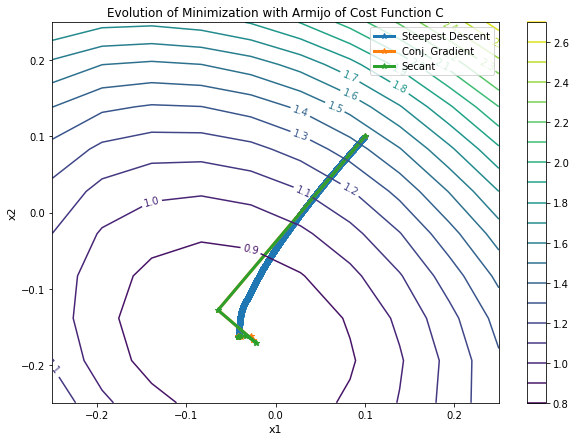

In [48]:
names = ['Steepest Descent', 'Conj. Gradient', 'Secant']
visualize_optimization_multiple([x_hist1_c, x_hist2_c, x_hist3_c], V_c_VIS, names, 'C', lim = 0.25, n = 10)

In [1]:
from algorithms import barrier_fn, penalty_fn, augmented_lagrangian, lagrange_newton
from cost_functions import V_a, gradV_a, V_b, gradV_b, V_1, h1_1, h1_2, V_2, h2_1, h2_2, V_3, h1_3, h2_3
from utils import visualize_optimization, visualize_optimization_multiple
import numpy as np



In [3]:
x0 = np.array([[1.1],[1.1]])

x, minimum, x_hist1, V_hist=  penalty_fn(x0,
                        V_1,
                        gradient_function=None,
                        ecp=h2_1,
                        icp=[h1_1],
                        step_size = 'armijo',
                        threshold = 1e-3, 
                        log = False, 
                        h = 1e-5, 
                        max_iter = 1e5, 
                        fd_method = 'central', 
                        track_history = True)
x, minimum

(array([[0.70736128],
        [0.70735205]]),
 1.585286668662608)

In [4]:

x, minimum, x_hist2, V_hist=  penalty_fn(x0,
                                        V_1,
                                        gradient_function=None,
                                        ecp=h2_1,
                                        icp=[h1_1],
                                        step_size = 'armijo',
                                        threshold = 1e-3, 
                                        log = False, 
                                        h = 1e-5, 
                                        max_iter = 1e5, 
                                        fd_method = 'central', 
                                        track_history = True)

x, minimum

(array([[0.70736128],
        [0.70735205]]),
 1.585286668662608)

In [5]:


cost_function = V_1
inequality_constraints = [h1_1]
equality_constraints = [h2_1]
gradient_function = None

x, minimum, x_hist3, v_hist = augmented_lagrangian(x0,
                                            cost_function, 
                                            equality_constraints, 
                                            inequality_constraints,
                                            log = False,
                                            track_history = True)


x, minimum


(array([[0.71193787],
        [0.71193791]]),
 1.576124223393165)

In [6]:
cost_function = V_1
inequality_constraints = [h1_1]
equality_constraints = [h2_1]
gradient_function = None

x, minimum, x_hist4, _= lagrange_newton(x0,
                                cost_function, 
                                equality_constraints = equality_constraints, 
                                inequality_constraints = inequality_constraints,
                                threshold = 1e-6,
                                log = False,
                                track_history = True)

x, minimum

(array([[0.61803399],
        [0.78615138]]),
 1.5958146334926817)

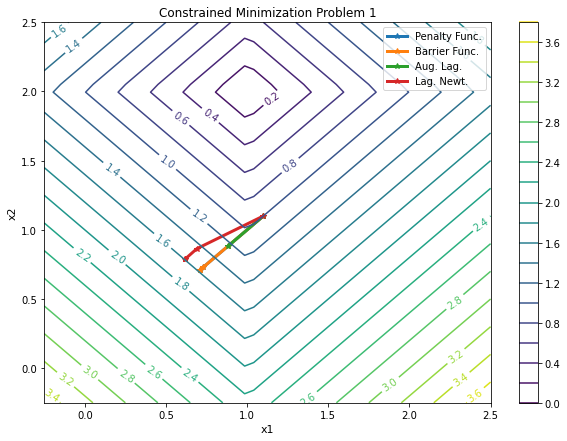

In [9]:
names = ['Penalty Func.', 'Barrier Func.', 'Aug. Lag.', 'Lag. Newt.']
title = 'Constrained Minimization Problem 1'
visualize_optimization_multiple([x_hist1, x_hist2, x_hist3, x_hist4], V_1, names, title, lim = 2.0, n = 50, bounds = [0.25,2.5,0.25,2.5])

In [ ]:
## FIND CONSISTENT STARTING POINT

In [52]:
x0 = np.array([[0.5],[0.7]])

x, minimum, x_hist1, V_hist=  penalty_fn(x0,
                        V_2,
                        gradient_function=None,
                        ecp=None,
                        icp=[h1_2,h2_2],
                        step_size = 'armijo',
                        threshold = 1e-3, 
                        log = False, 
                        h = 1e-5, 
                        max_iter = 1e5, 
                        fd_method = 'central', 
                        track_history = True)
x, minimum

(array([[0.5],
        [0.7]]),
 -0.35)

In [59]:
x0 = np.array([[0.5],[0.7]])



x, minimum, x_hist2, _ =  barrier_fn(x0,
                        V_2,
                        gradient_function=None,
                        ecp=None,
                        icp=[h1_2,h2_2],
                        step_size = 1e-4,
                        threshold = 1e-4, 
                        log = False, 
                        h = 1e-5, 
                        max_iter = 1e5, 
                        fd_method = 'central', 
                        track_history = True)

x, minimum

(array([[0.50775724],
        [0.66837511]]),
 -0.3393722972842482)

In [60]:
x0 = np.array([[0.5],[0.7]])


cost_function = V_2
inequality_constraints = [h1_2, h2_2]
equality_constraints = []
gradient_function = None

x, minimum, x_hist3, v_hist = augmented_lagrangian(x0,
                                            cost_function, 
                                            equality_constraints, 
                                            inequality_constraints,
                                            threshold = 1e-6,
                                            log = False,
                                            track_history = True)
x, minimum

(array([[0.6536048 ],
        [0.57166661]]),
 -0.3736440426519147)

In [61]:
x0 = np.array([[0.5],[0.7]])


cost_function = V_1
inequality_constraints = [h1_1, h2_1]
equality_constraints = []
gradient_function = None

x, minimum, x_hist4, _= lagrange_newton(x0,
                                cost_function, 
                                equality_constraints = equality_constraints, 
                                inequality_constraints = inequality_constraints,
                                log = False,
                                track_history = True)

x, minimum


(array([[0.61803399],
        [0.78615138]]),
 1.5958146334926817)

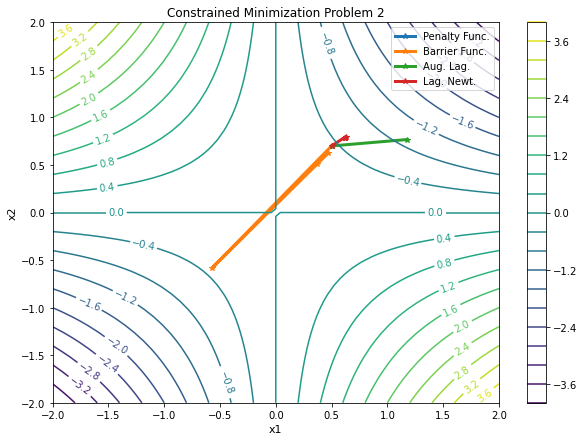

In [62]:
names = ['Penalty Func.', 'Barrier Func.', 'Aug. Lag.', 'Lag. Newt.']
title = 'Constrained Minimization Problem 2'
visualize_optimization_multiple([x_hist1, x_hist2, x_hist3, x_hist4], V_2, names, title, lim = 2.0, n = 50)

In [ ]:
## ADD BARRIER AND PENALTY RESULTS

In [41]:
x0 = np.array([[2],[2]])


cost_function = V_3
inequality_constraints = [h1_3]
equality_constraints = [h2_3]
gradient_function = None

x, minimum, x_hist3, v_hist = augmented_lagrangian(x0,
                                            cost_function, 
                                            equality_constraints, 
                                            inequality_constraints,
                                            threshold = 1e-4,
                                            log = False,
                                            track_history = True)
x, minimum


(array([[0.99999246],
        [1.73206239]]),
 -0.7320850105842696)

In [42]:
cost_function = V_3
inequality_constraints = [h1_3]
equality_constraints = [h2_3]
gradient_function = None

x, minimum, x_hist4, _= lagrange_newton(x0,
                                cost_function, 
                                equality_constraints = equality_constraints, 
                                inequality_constraints = inequality_constraints,
                                log = False,
                                track_history = True)


x, minimum

(array([[1.        ],
        [1.73205081]]),
 -0.7320508075690444)

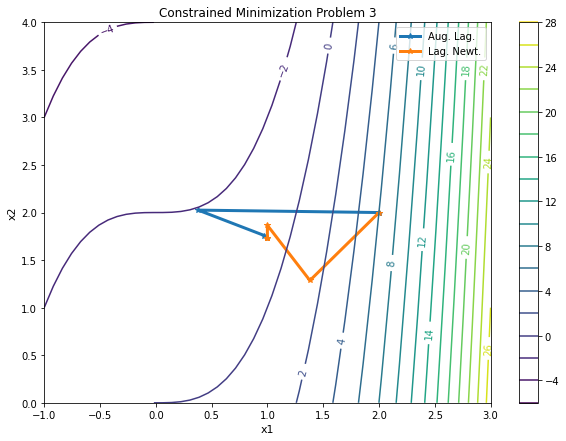

In [43]:
#ADD 
names = ['Aug. Lag.', 'Lag. Newt.']
title = 'Constrained Minimization Problem 3'
visualize_optimization_multiple([ x_hist3, x_hist4], V_3, names, title, lim = 2.0, n = 50, bounds = [1, 3, 0, 4])